# Initial Setup

In [116]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import pandas as pd

In [118]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [119]:
PATH = "/diskA/jethro/terraweather"

# Data Exploration

Gauge.csv contains Rain Gauge readings for 2017, 52 weeks in total.

In [120]:
gauge = pd.read_csv(f'{PATH}/gauge.csv')

In [6]:
gauge.describe()

,Year,Week,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
count,52.0,52.000000,52.000000,50.000000,49.000000,50.00000,52.000000,50.000000,51.000000,52.000000,...,32.000000,48.000000,29.000000,41.000000,51.000000,52.000000,45.000000,44.000000,40.000000,43.000000
mean,2017.0,26.500000,49.676923,47.668000,40.395918,40.16800,55.517308,50.828000,38.984314,55.567308,...,36.762500,51.508333,50.951724,52.658537,60.625490,39.338462,44.200000,47.740909,49.380000,31.660465
std,0.0,15.154757,42.372617,41.638711,34.880068,38.86549,46.880046,41.178378,32.525555,51.104724,...,29.038148,37.510168,33.203298,47.571467,53.773625,35.642265,37.351768,35.348223,40.164809,30.742852
min,2017.0,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,13.750000,11.300000,12.600000,10.600000,8.65000,20.675000,15.500000,16.500000,21.000000,...,13.300000,27.250000,23.400000,17.000000,25.350000,11.300000,12.200000,25.950000,21.450000,7.200000
50%,2017.0,26.500000,41.900000,41.700000,28.400000,29.30000,46.700000,39.300000,34.800000,39.600000,...,30.200000,41.000000,49.600000,40.600000,50.500000,30.000000,34.200000,40.700000,43.300000,21.000000
75%,2017.0,39.250000,76.850000,73.900000,68.200000,62.80000,80.900000,84.000000,52.300000,81.350000,...,51.000000,70.450000,77.800000,73.800000,73.750000,64.900000,71.400000,59.650000,71.300000,49.300000
max,2017.0,52.000000,151.000000,145.200000,124.600000,150.80000,184.400000,153.600000,130.800000,243.800000,...,123.400000,145.600000,122.600000,222.000000,272.300000,148.400000,162.600000,169.800000,171.200000,117.400000


In [130]:
gauge.head()

,Year,Week,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,2017,1,20.8,25.6,9.8,8.6,21.0,13.2,4.8,45.6,...,22.4,27.6,30.0,31.8,50.7,6.2,42.6,31.6,10.0,22.0
1,2017,2,54.0,0.2,14.2,21.4,74.2,2.6,40.6,37.2,...,1.6,45.2,2.4,40.6,49.2,0.0,1.0,50.8,48.0,0.0
2,2017,3,149.6,145.2,92.8,72.6,177.1,35.2,67.2,96.0,...,32.2,128.2,81.4,133.0,157.3,17.8,57.0,169.8,74.6,70.6
3,2017,4,120.0,93.0,124.6,74.6,110.9,117.2,81.8,84.2,...,123.4,78.0,92.8,83.8,87.6,98.2,78.0,77.4,110.0,117.4
4,2017,5,46.0,2.4,16.6,69.0,91.7,13.8,67.8,86.6,...,7.6,54.0,23.0,78.4,98.3,11.4,32.6,37.0,78.6,9.6


In [139]:
import datetime
def year_week_to_date(input):
    year, week = input
    return datetime.datetime.strptime(f'{year}-{week}-0',"%Y-%W-%w")

In [140]:
gauge["date"] = gauge[["Year", "Week"]].apply(year_week_to_date, axis=1)

In [149]:
gauge = gauge.set_index(pd.DatetimeIndex(gauge["date"]))

In [151]:
UNWANTED_GAUGE_COLUMNS = ["Year", "Week", "date"]

In [157]:
gauge.drop(gauge[UNWANTED_GAUGE_COLUMNS], axis=1, inplace=True)

In [159]:
gauge = gauge.interpolate(method="time")

In [166]:
gauge

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,,,,,,,,,,,,
2017-01-08,20.8,25.6,9.8,8.600000,21.0,13.200000,4.8,45.6,43.000000,18.6,...,22.400000,27.600000,30.000000,31.800000,50.70,6.2,42.600000,31.6,10.000000,22.000000
2017-01-15,54.0,0.2,14.2,21.400000,74.2,2.600000,40.6,37.2,0.000000,2.8,...,1.600000,45.200000,2.400000,40.600000,49.20,0.0,1.000000,50.8,48.000000,0.000000
2017-01-22,149.6,145.2,92.8,72.600000,177.1,35.200000,67.2,96.0,40.500000,80.2,...,32.200000,128.200000,81.400000,133.000000,157.30,17.8,57.000000,169.8,74.600000,70.600000
2017-01-29,120.0,93.0,124.6,74.600000,110.9,117.200000,81.8,84.2,81.000000,106.6,...,123.400000,78.000000,92.800000,83.800000,87.60,98.2,78.000000,77.4,110.000000,117.400000
2017-02-05,46.0,2.4,16.6,69.000000,91.7,13.800000,67.8,86.6,4.600000,17.4,...,7.600000,54.000000,23.000000,78.400000,98.30,11.4,32.600000,37.0,78.600000,9.600000
2017-02-12,62.0,12.2,35.0,63.800000,40.6,51.600000,36.2,23.4,28.600000,110.2,...,58.400000,30.000000,28.516667,77.400000,41.00,18.4,27.800000,51.2,83.600000,7.800000
2017-02-19,23.6,8.2,20.0,14.800000,23.8,9.200000,19.0,10.2,19.000000,7.8,...,20.600000,10.000000,34.033333,76.400000,12.20,2.4,12.200000,11.8,28.200000,7.200000
2017-02-26,59.4,14.2,41.6,57.800000,48.2,38.800000,34.8,70.2,114.800000,17.4,...,65.600000,63.200000,39.550000,75.400000,64.40,23.4,95.400000,52.0,39.000000,33.200000
2017-03-05,57.2,20.2,52.4,68.000000,66.8,99.600000,51.4,85.0,97.200000,47.6,...,79.200000,101.400000,45.066667,54.400000,51.90,93.6,67.400000,70.2,64.600000,37.400000


In [163]:
np_gauge

array([[  20.8,   25.6,    9.8, ...,   31.6,   10. ,   22. ],
       [  54. ,    0.2,   14.2, ...,   50.8,   48. ,    0. ],
       [ 149.6,  145.2,   92.8, ...,  169.8,   74.6,   70.6],
       ..., 
       [ 105.8,   65.4,   91.8, ...,   59.8,  159. ,    2.4],
       [  48.4,   30.2,   23.6, ...,   23.2,   34.8,    2.4],
       [ 106. ,   67.4,   85.6, ...,  121.4,  171.2,    2.4]])

# Radar Files

In [7]:
import glob
radar_files = glob.glob(f'{PATH}/radar/*.csv')

In [8]:
radar_files

['/diskA/jethro/terraweather/radar/2017-36.csv',
 '/diskA/jethro/terraweather/radar/2017-39.csv',
 '/diskA/jethro/terraweather/radar/2017-21.csv',
 '/diskA/jethro/terraweather/radar/2017-13.csv',
 '/diskA/jethro/terraweather/radar/2017-41.csv',
 '/diskA/jethro/terraweather/radar/2017-22.csv',
 '/diskA/jethro/terraweather/radar/2017-18.csv',
 '/diskA/jethro/terraweather/radar/2017-37.csv',
 '/diskA/jethro/terraweather/radar/2017-38.csv',
 '/diskA/jethro/terraweather/radar/2017-35.csv',
 '/diskA/jethro/terraweather/radar/2017-19.csv',
 '/diskA/jethro/terraweather/radar/2017-31.csv',
 '/diskA/jethro/terraweather/radar/2017-45.csv',
 '/diskA/jethro/terraweather/radar/2017-17.csv',
 '/diskA/jethro/terraweather/radar/2017-26.csv',
 '/diskA/jethro/terraweather/radar/2017-33.csv',
 '/diskA/jethro/terraweather/radar/2017-32.csv',
 '/diskA/jethro/terraweather/radar/2017-15.csv',
 '/diskA/jethro/terraweather/radar/2017-47.csv',
 '/diskA/jethro/terraweather/radar/2017-20.csv',
 '/diskA/jethro/terr

In [234]:
import os
dfs = []

for f in radar_files:
    df = pd.read_csv(f)
    yearweek = os.path.splitext(os.path.basename(f))[0].split('-')
    df["date"] = year_week_to_date(yearweek)
    dfs.append(df)

In [235]:
radar = pd.concat(dfs)

In [236]:
radar = radar.set_index(["lat", "long", "date"])

In [237]:
radar.head()

0  1  2  3  4  5  6  7  8  9 ...  24  25  26  27  28  \
lat long date                                        ...                       
0   0    2017-09-10  1872  0  0  1  1  0  0  1  6  3 ...   3   4   0   2   0   
    1    2017-09-10  1863  0  0  0  1  3  2  1  9  5 ...   3   2   2   0   0   
    2    2017-09-10  1868  0  0  0  0  3  0  4  9  9 ...   6   1   1   0   0   
    3    2017-09-10  1868  0  0  0  1  0  4  7  8  7 ...   6   5   1   0   0   
    4    2017-09-10  1868  0  0  0  1  2  5  4  8  8 ...   5   3   2   0   0   

                     29  30  31  32  33  
lat long date                            
0   0    2017-09-10   0   0   0   0   0  
    1    2017-09-10   0   0   0   0   0  
    2    2017-09-10   0   0   0   0   0  
    3    2017-09-10   0   0   0   0   0  
    4    2017-09-10   0   1   0   0   0  

[5 rows x 34 columns]

In [238]:
radar = radar.interpolate(method="linear") # this might be a bit strange

In [241]:
rm[0]

array([1872,    0,    0,    1,    1,    0,    0,    1,    6,    3,    9,
         15,   12,    7,   20,    5,    8,    9,    8,    6,    5,    7,
          7,    5,    3,    4,    0,    2,    0,    0,    0,    0,    0,
          0])

# The model

In [18]:
MAX_SIZE=480

In [62]:
from keras.layers import Input, Dense, Lambda, Merge
from keras.models import Model

In [197]:
inputs = Input(shape=(52,))

In [198]:
import keras.backend as K

def my_relu(x):
    return K.cast(K.round(K.relu(x) * MAX_SIZE),dtype='int32')

In [284]:
x = Dense(64, activation='relu')(inputs)
x = Dense(1, activation=my_relu)(x)

y = Dense(64, activation='relu')(inputs)
y = Dense(1, activation=my_relu)(y)

# set rr_matrix
rr_matrix = [[1.,2.,3.],[2., 3., 4.]]
rr_const = K.variable(rr_matrix)
rr_input_matrix = Input(tensor=rr_const)

m = Dense(64, activation='relu')(rr_input_matrix)
m = Dense(1, activation='relu')(rr_input_matrix)

print(m.shape)
def my_merge(v):
    m, x, y = v
    return m[x[0]][y[0]]

prediction = Lambda(my_merge)([m, x, y])

(2, 1)


ValueError: Shape must be rank 1 but is rank 2 for 'lambda_72/strided_slice_1' (op: 'StridedSlice') with input shapes: [2,1], [1,1], [1,1], [1].

In [169]:
model = Model(inputs=inputs, outputs=prediction)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

TypeError: Output tensors to a Model must be Keras tensors. Found: <keras.layers.core.Lambda object at 0x7f13bc35afd0>

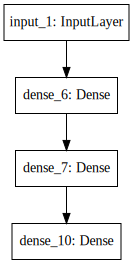

In [168]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))